In [1]:
import numpy as np 
import random 
import time 

In [5]:
import matplotlib.pyplot as plt

## Q-learning

In [112]:
class QLearningPlayer():
    
    def __init__(self, learning_rate, discount, epsilon, state_space, action_space, start_position, game_score):
        self.x = start_position 
        self.actions = ['left', 'right']
        self.actions_executed = []
        self.num_episodes = 200
        self.random_actions_taken_per_epoch = [0]
        self.random_actions = 0 
        
        self.learning_rate = learning_rate 
        self.discount = discount 
        self.epsilon = epsilon 
        
        self.state_space = state_space
        self.action_space = action_space
        self.reward = 0
        self.reward_list = []
        self.number_of_steps_to_cheese = []
        
        self.game_score = game_score
                
        
    def initialize_q_table(self):
        # initialize to zeros 
        # self.Q = np.zeros([state_space, action_space])
        # or to random values 
        self.Q = np.random.randn(self.state_space, self.action_space)
        
        ### determine how you define old_score first. 
        
    
    def update_Q_table(self, s, a):
        s1 = self.x
        self.Q[s, a] = self.Q[s, a] + self.learning_rate*(self.reward + self.discount*max(self.Q[s1, :]) - self.Q[s,a]) 
        print ('old state is: ', s)
        print ('new state is: ', s1)
        
        
    # this score stuff is pretty unnecessary, you could just put these rewards back into the get_input function directly.
    def get_reward(self):
        # evaluate last action and update the Q-table. 
        if self.game_score - self.old_score == 100: 
            self.reward = 10
        elif self.old_score < self.game_score: 
            self.reward = 1 
            ## adding this line  
        elif self.old_score > self.game_score:
            self.reward = -1 
        print ('reward is: ', self.reward)
        self.reward_list.append(self.reward)
        
        
        
    def get_input(self):
        # pause for us to follow 
        time.sleep(0.05) 
        
        self.first_run = True
        self.initialize_q_table()
        
        
        for i in range(self.num_episodes): 
            
            self.x = 1
            self.actions_executed = []
            self.reward_list = []
            
            if i != 0:
                self.random_actions_taken_per_epoch.append(self.random_actions)
                self.random_actions = 0 
                self.epsilon = 1./((i/150) + 10)
            
            self.game_score = 1
            self.old_score = 1 
            
            j = 0 
            
            print ('Episode: ', i)
            while j < 99: 
                j += 1 
                
                
                s = self.x
                # choose an action based on Qvalue estimates for state 
                if np.random.rand(1) < self.epsilon: 
                    # select a random action 
                    self.random_actions += 1 
                    a = np.random.randint(self.action_space) 
                else: 
                    # select based on Q table
                    a = np.argmax(self.Q[s, :])
                    # add this term later 
                    # + np.random.randn(1, self.action_space)*(1./(i+1))
                    # and define i.  
                    
                    
                    
                
                self.actions_executed.append(self.actions[a]) 
                print ('Action taken: ', self.actions[a])
                
                # capture current state and score 
                self.old_score = self.game_score



                # take action and then 
                # give score according to where you are in the game:
                if self.actions[a] == 'left':
                    if self.x == 0:
                        print ('You are at the pit! At episode {}, step {}'.format(i, j))
                        self.game_score -= 1
                        self.get_reward()
                        self.update_Q_table(s, a)
                        self.number_of_steps_to_cheese.append(200)
                        print ('------------------------------------')
                        break  
                    else:
                        self.x -= 1
                        self.game_score -= 1
                        self.get_reward()
                        self.update_Q_table(s, a)
                        print ('Come back!')
                        
                elif self.actions[a] == 'right':
                    if self.x == 9:
                        print ('You win at episode {}, at {} steps!'.format(i, j))
                        self.game_score += 100
                        self.get_reward()
                        self.update_Q_table(s, a)
                        self.number_of_steps_to_cheese.append(j)
                        print ("Old score: ", self.old_score)
                        print ('Game score: ', self.game_score)
                        print ('+++++++++++++++++++++++++++++++++++++') 
                        break
                    else:
                        self.x += 1 
                        self.game_score += 1 
                        self.get_reward()
                        self.update_Q_table(s, a)
                        print ('Keep up the good work!')
                        
                        
                if j == 98:
                    self.number_of_steps_to_cheese.append(250)
                print ('')
    
            
            print ('')
            print ('') 

        return 
            

In [1]:
qlearner = QLearningPlayer(learning_rate=0.2, discount=0.9, epsilon=0.1, state_space=10, action_space=2, start_position=1, game_score=1)
my_action = qlearner.get_input()

In [118]:
qlearner.number_of_steps_to_cheese

[200,
 250,
 250,
 250,
 61,
 9,
 13,
 11,
 11,
 9,
 9,
 200,
 13,
 9,
 17,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 11,
 9,
 11,
 13,
 9,
 11,
 9,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 19,
 9,
 9,
 9,
 9,
 11,
 11,
 9,
 9,
 9,
 17,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 11,
 9,
 11,
 9,
 9,
 9,
 15,
 9,
 9,
 11,
 13,
 11,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 11,
 13,
 9,
 9,
 9,
 13,
 11,
 9,
 9,
 11,
 9,
 11,
 11,
 9,
 13,
 11,
 9,
 9,
 13,
 9,
 13,
 9,
 11,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 11,
 13,
 9,
 9,
 9,
 9,
 13,
 11,
 9,
 11,
 9,
 9,
 11,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 9,
 9,
 9,
 9,
 13,
 9,
 9,
 9,
 9,
 9,
 9,
 15,
 9,
 9,
 9,
 9,
 11,
 11,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 9,
 9,
 9,
 9,
 11,
 9]

In [119]:
len(qlearner.number_of_steps_to_cheese)

200

Text(0,0.5,'num_steps took to get to cheese')

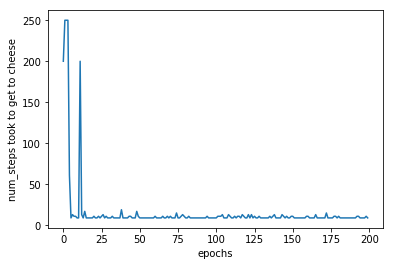

In [120]:
plt.plot(range(200), qlearner.number_of_steps_to_cheese)
plt.xlabel('epochs')
plt.ylabel('num_steps took to get to cheese')

In [121]:
len(qlearner.random_actions_taken_per_epoch)

200

Text(0,0.5,'number of random actions taken per epoch')

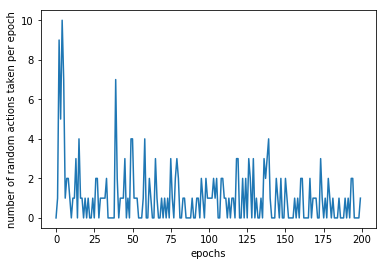

In [122]:
plt.plot(range(200), qlearner.random_actions_taken_per_epoch)
plt.xlabel('epochs')
plt.ylabel('number of random actions taken per epoch')

In [123]:
qlearner.epsilon

0.08828722778104768

<br><Br/>

## Random Play

In [108]:
class randomPlayer():
    
    def __init__(self, state_space, action_space, start_position, game_score):
        self.x = start_position 
        self.actions = ['left', 'right']
        self.actions_executed = []
        self.num_episodes = 200
        
        self.learning_rate = 0.2
        self.discount = 0.9
        self.epsilon = 0.9 
        
        self.state_space = state_space
        self.action_space = action_space
        self.reward = 0
        self.reward_list = []
        self.number_of_steps_to_cheese = []
        
        self.game_score = game_score
                
        
    def initialize_q_table(self):
        # initialize to zeros 
        # self.Q = np.zeros([state_space, action_space])
        # or to random values 
        self.Q = np.random.randn(self.state_space, self.action_space)
        
        ### determine how you define old_score first. 
        
    
    def update_Q_table(self, s, a):
        s1 = self.x
        self.Q[s, a] = self.Q[s, a] + self.learning_rate*(self.reward + self.discount*max(self.Q[s1, :]) - self.Q[s,a]) 
        print ('old state is: ', s)
        print ('new state is: ', s1)
        
        
    # this score stuff is pretty unnecessary, you could just put these rewards back into the get_input function directly.
    def get_reward(self):
        # evaluate last action and update the Q-table. 
        if self.game_score - self.old_score == 100: 
            self.reward = 10
        elif self.old_score < self.game_score: 
            self.reward = 1 
            ## adding this line  
        elif self.old_score > self.game_score:
            self.reward = -1 
        print ('reward is: ', self.reward)
        self.reward_list.append(self.reward)
        
        
        
    def get_input(self):
        # pause for us to follow 
        time.sleep(0.05) 
        
        self.first_run = True
        self.initialize_q_table()
        
        
        for i in range(self.num_episodes): 
            
            self.x = 1
            self.actions_executed = []
            self.reward_list = []
            
            self.game_score = 1
            self.old_score = 1 
            
            j = 0 
            
            print ('Episode: ', i)
            while j < 99: 
                j += 1 
                
                
                s = self.x
                # choose an action based on Qvalue estimates for state 
                # select a random action 
                a = np.random.randint(self.action_space) 
                    
                    
                
                self.actions_executed.append(self.actions[a]) 
                print ('Action taken: ', self.actions[a])
                
                # capture current state and score 
                self.old_score = self.game_score



                # take action and then 
                # give score according to where you are in the game:
                if self.actions[a] == 'left':
                    if self.x == 0:
                        print ('You are at the pit! At episode {}, step {}'.format(i, j))
                        self.game_score -= 1
                        self.get_reward()
                        self.update_Q_table(s, a)
#                         self.number_of_steps_to_cheese.append(200)
                        print ('------------------------------------')
                        break  
                    else:
                        self.x -= 1
                        self.game_score -= 1
                        self.get_reward()
                        self.update_Q_table(s, a)
                        print ('Come back!')
                        
                elif self.actions[a] == 'right':
                    if self.x == 9:
                        print ('You win at episode {}, at {} steps!'.format(i, j))
                        self.game_score += 100
                        self.get_reward()
                        self.update_Q_table(s, a)
                        self.number_of_steps_to_cheese.append(j)
                        print ("Old score: ", self.old_score)
                        print ('Game score: ', self.game_score)
                        print ('+++++++++++++++++++++++++++++++++++++') 
                        break
                    else:
                        self.x += 1 
                        self.game_score += 1 
                        self.get_reward()
                        self.update_Q_table(s, a)
                        print ('Keep up the good work!')
                
                
                
#                 if j == 98:
#                     self.number_of_steps_to_cheese.append(200)
                    
                print ('')
    
            
            print ('')
            print ('') 

        return 
            

In [2]:
randomlearner = randomPlayer(state_space=10, action_space=2, start_position=1, game_score=1)
my_random_action = randomlearner.get_input()

In [110]:
len(randomlearner.number_of_steps_to_cheese)

40

Text(0,0.5,'num_steps took to get to cheese')

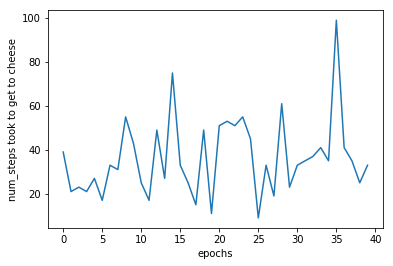

In [111]:
plt.plot(range(len(randomlearner.number_of_steps_to_cheese)), randomlearner.number_of_steps_to_cheese)
plt.xlabel('epochs')
plt.ylabel('num_steps took to get to cheese')